In [1]:
import mediapipe as mp
import cv2
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import itertools as itr
import pprint, pickle

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_pose = mp.solutions.pose

In [2]:
!python --version

Python 3.8.15


In [2]:
name='yohan'
direction='right'
cam='side'

In [6]:
cap = cv2.VideoCapture("/home/cbk/Videos/last vids/{}/{}_{}_3.mp4".format(cam,name,direction))



#check the fps
#fps = cap.get(cv2.CAP_PROP_FPS) 
#print(fps)

myarray = np.empty(shape=(1,33,5))

start = time.time()

# Initiate holistic model
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    idx=0
    while cap.isOpened():
        
        ret, frame = cap.read()
        if ret:

            #set specific frames sequence by vedio
            #cap.set(cv2.CAP_PROP_POS_FRAMES, idx* 4)

            # Recolor Feed
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # Make Detections
            results = pose.process(image)
            # print(results.face_landmarks)

            # Recolor image back to BGR for rendering
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            # Pose Detections
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            #print(results.pose_landmarks)
            #print("--------------------------------------")

            if results.pose_landmarks != None:
                key_list= []
                t=time.time()
                for data_point in results.pose_landmarks.landmark:
                    key_list.append([data_point.x,data_point.y,data_point.z,t,data_point.visibility])    
                mat = np.array(key_list)
                myarray = np.vstack([myarray,[mat]])

            idxx=time.time()
            #idx+=1
            
            ##TODO : I added back following 2 lines, jaye commented out those
            #path="/home/cbk/fyp/Data/frames"
            #cv2.imwrite(os.path.join(path , '{}.png'.format(idxx)),image)

            cv2.imshow('Raw Webcam Feed', image)
            #................................................................

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                #idx=0
        else:
            break
            
            
end = time.time()
print(end - start)
cap.release()
cv2.destroyAllWindows()



9.004141807556152


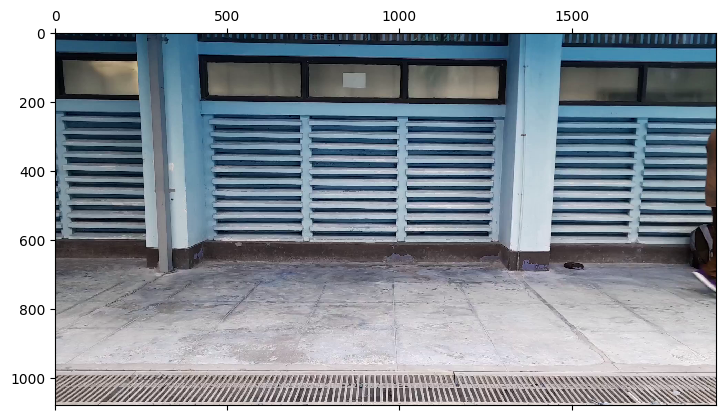

In [6]:
plt.matshow(image)

In [7]:
key_array = np.delete(myarray, 0, 0)

In [8]:
len(key_array)

136

In [9]:
key_points=['Nose','L_eye_inner','L_eye','L_eye_outer','R_eye_inner','R_eye','R_eye_outer','L_ear','R_ear','mouth_L','mouth_R','L_shoulder','R_shoulder','L_elbow','R_elbow','L_wrist','R_wrist','L_pinky','R_pinky','L_index','R_index','L_thumb','R_thumb','L_hip','R_hip','L_knee','R_knee','L_ankle','R_ankle','L_heel','R_heel','L_foot_index','R_foot_index']

## plot visibility overtime

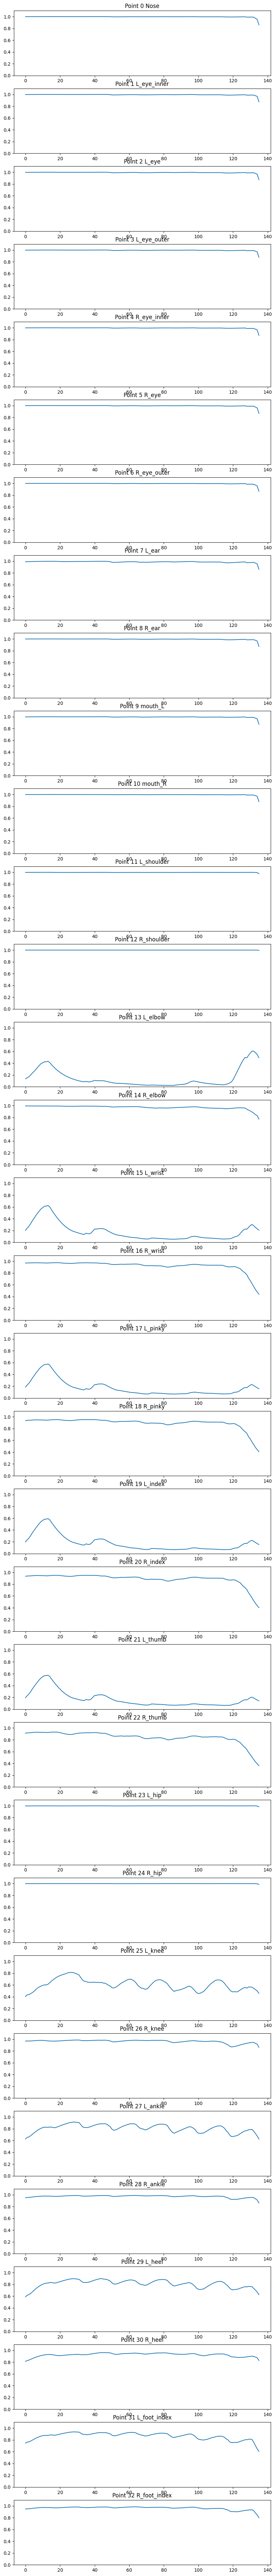

In [10]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(33, 1, figsize=(10,100))

v_values = key_array[:,:,4]  # Extract visibility values

# Loop through each subplot and plot a graph
for i in range(33):
    v=[]
    for j in range(len(v_values)):
        # Calculate data for each subplot
        v.append(v_values[j][i])
        
        # Plot data on subplot
    axs[i].plot(v)
    axs[i].set_title(f'Point {i} {key_points[i]}')
    axs[i].set_ylim([0, 1.1])
        
# Show the plot
plt.show()

### find mean of visibility values over time period and find dropping point indices

In [11]:
# calculate the mean value of each point across all frames
mean_visibility_values = np.mean(v_values, axis=0)

threshold = 0.8

# find the points that have a visibility less than the threshold
potentially_wrong_points = np.where(mean_visibility_values < threshold)[0]

print(potentially_wrong_points)

[13 15 17 19 21 25]


# Save the result in file

In [12]:
output = open('/home/cbk/fyp/Untitled Folder/key_arrays_new/key_array_{}_{}.pkl'.format(name,direction), 'wb')

#output2 = open('/home/cbk/fyp/test_drive_split_at_first/dropping_para_visibility', 'wb')


#commentout this if we are extracting keypoints for evidance video
#pickle.dump(potentially_wrong_points, open('/home/cbk/fyp/test_drive_split_at_first/dropping_para_visibility', 'wb'))

pickle.dump(key_array, output)

#pickle.dump(potentially_wrong_points, output2)

output.close()

## test code to find std and mean

In [13]:
# assume data is a numpy array with shape (num_frames, 33, 4)
# the 33 points correspond to the different parts of the body
# the last dimension contains the x, y, z and t (time) coordinates
# of each point

# calculate the mean value of each point across all frames
mean_values = np.mean(key_array, axis=0)

# calculate the standard deviation of each point across all frames
std_values = np.std(key_array, axis=0)

# set a threshold for the standard deviation
threshold = 0.1

# find the points that have a standard deviation above the threshold
potentially_wrong_points = np.where(std_values > threshold)[0]

# print the indices of the potentially wrong points
print("Potentially wrong points:", potentially_wrong_points)

Potentially wrong points: [ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10 11 11
 12 12 13 13 13 14 14 15 15 15 16 16 17 17 17 18 18 19 19 19 20 20 21 21
 21 22 22 22 23 23 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31 32 32]


In [17]:
##(std_values[point][x])

## Plot x value over frames 

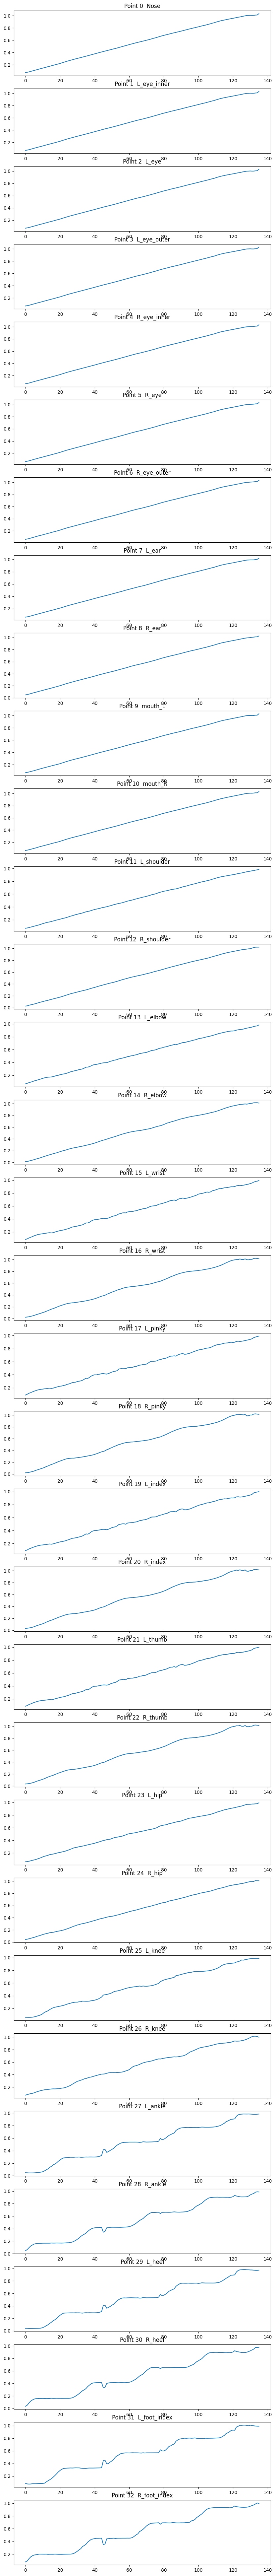

In [14]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(33, 1, figsize=(10,100))

x_values = key_array[:,:,0]  # Extract x values

# Loop through each subplot and plot a graph
for i in range(33):
    x=[]
    for j in range(len(x_values)):
        # Calculate data for each subplot
        x.append(x_values[j][i])
        
        # Plot data on subplot
    axs[i].plot(x)
    axs[i].set_title(f'Point {i}  {key_points[i]}')
        
# Show the plot
plt.show()

## Plot y value over frames 

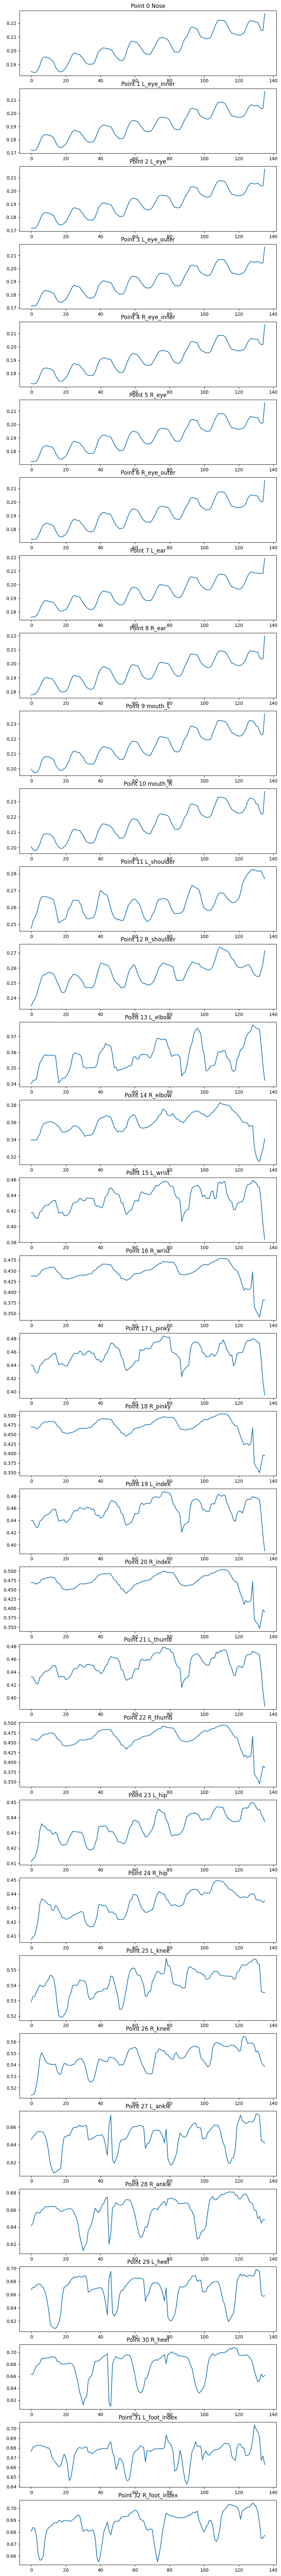

In [15]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(33, 1, figsize=(10,100))

y_values = key_array[:,:,1]  # Extract x values

# Loop through each subplot and plot a graph
for i in range(33):
    y=[]
    for j in range(len(y_values)):
        # Calculate data for each subplot
        y.append(y_values[j][i])
        
        # Plot data on subplot
    axs[i].plot(y)
    axs[i].set_title(f'Point {i} {key_points[i]}')
        
# Show the plot
plt.show()

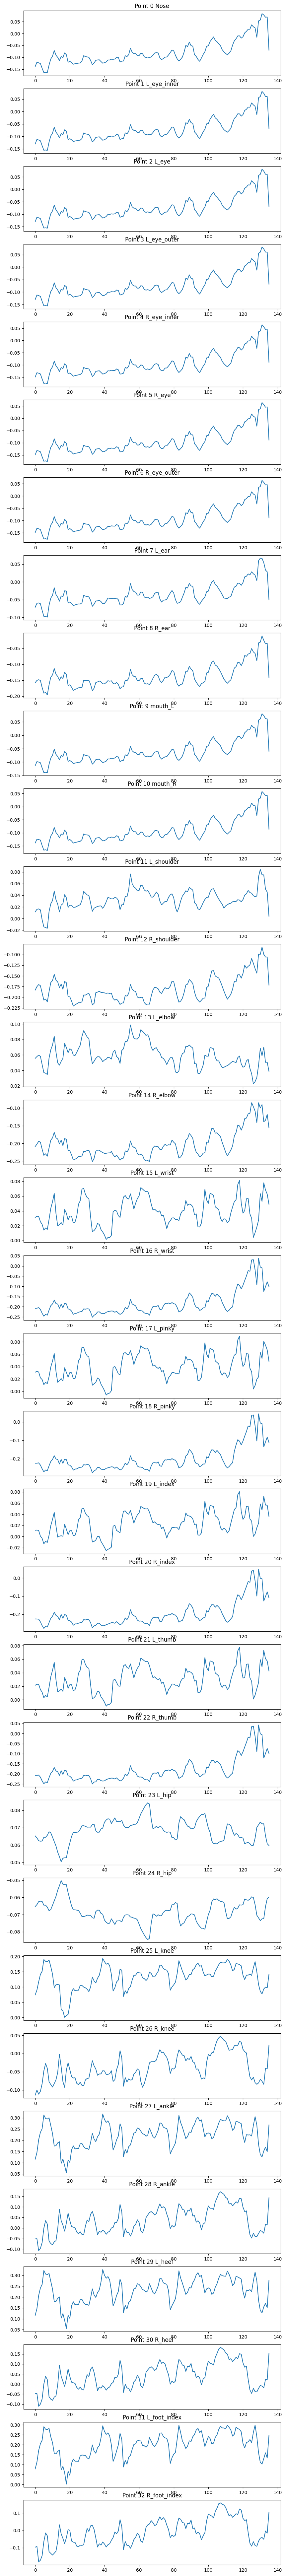

In [16]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(33, 1, figsize=(10,100))

z_values = key_array[:,:,2]  # Extract z values

# Loop through each subplot and plot a graph
for i in range(33):
    z=[]
    for j in range(len(z_values)):
        # Calculate data for each subplot
        z.append(z_values[j][i])
        
        # Plot data on subplot
    axs[i].plot(z)
    axs[i].set_title(f'Point {i} {key_points[i]}')
        
# Show the plot
plt.show()

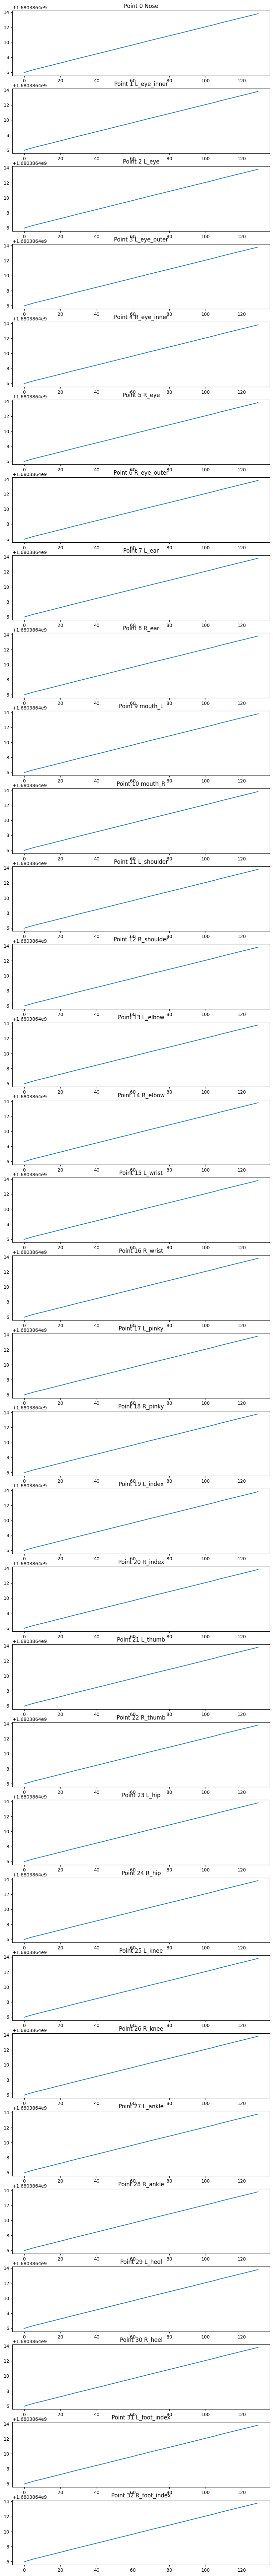

In [21]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(33, 1, figsize=(10,100))

t_values = key_array[:,:,3]  # Extract z values

# Loop through each subplot and plot a graph
for i in range(33):
    t=[]
    for j in range(len(t_values)):
        # Calculate data for each subplot
        t.append(t_values[j][i])
        
        # Plot data on subplot
    axs[i].plot(t)
    axs[i].set_title(f'Point {i} {key_points[i]}')
        
# Show the plot
plt.show()

In [22]:
key_points=['Nose',
 'L_eye_inner',
 'L_eye',
 'L_eye_outer',
'R_eye_inner',
 'R_eye',
 'R_eye_outer',
'L_ear',
'R_ear',
'mouth_L',
'mouth_R',
'L_shoulder',
'R_shoulder',
'L_elbow',
'R_elbow',
'L_wrist',
'R_wrist',
'L_pinky',
'R_pinky',
'L_index',
'R_index',
'L_thumb',
'R_thumb',
'L_hip',
'R_hip',
'L_knee',
'R_knee',
'L_ankle',
'R_ankle',
'L_heel',
'R_heel',
'L_foot_index',
'R_foot_index']

In [17]:
key_points[5]

'R_eye'